<a href="https://colab.research.google.com/github/Ziadnasser1/Machine-Learning-Training/blob/master/IrisKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
file_path = '/content/Iris.csv'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(file_path, header=None, names=column_names, skiprows = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


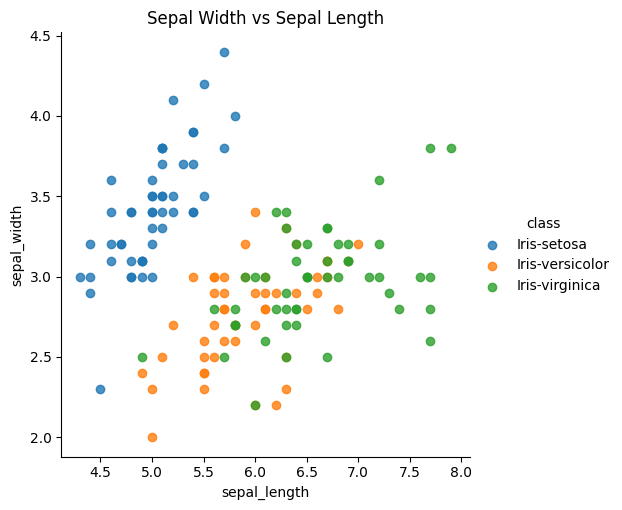

In [ ]:
sns.lmplot(x='sepal_length', y='sepal_width', hue='class', data=df, fit_reg=False)
plt.title('Sepal Width vs Sepal Length')
plt.show()

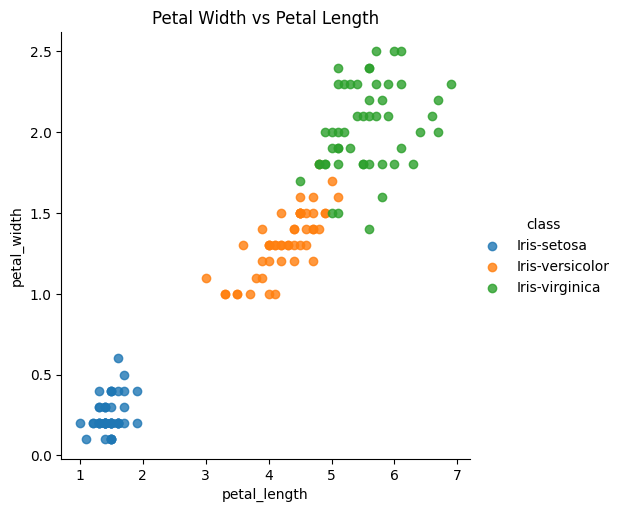

In [ ]:
sns.lmplot(x='petal_length', y='petal_width', hue='class', data=df, fit_reg=False)
plt.title('Petal Width vs Petal Length')
plt.show()

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

Y = df['class']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train[:5])
print(X_test[:5])
print(Y_train[:5])
print(Y_test[:5])

     sepal_length  sepal_width  petal_length  petal_width
82            5.5          2.4           3.7          1.0
134           6.3          2.8           5.1          1.5
138           6.4          3.1           5.5          1.8
76            6.6          3.0           4.4          1.4
110           7.2          3.6           6.1          2.5
     sepal_length  sepal_width  petal_length  petal_width
74            6.1          2.8           4.7          1.2
19            5.7          3.8           1.7          0.3
119           7.7          2.6           6.9          2.3
79            6.0          2.9           4.5          1.5
77            6.8          2.8           4.8          1.4
82     Iris-versicolor
134     Iris-virginica
138     Iris-virginica
76     Iris-versicolor
110     Iris-virginica
Name: class, dtype: object
74     Iris-versicolor
19         Iris-setosa
119     Iris-virginica
79     Iris-versicolor
77     Iris-versicolor
Name: class, dtype: object


In [ ]:
from statistics import mode
class MyKNN:
  def __init__(self, k=3, distance_measure='euclidean'):
    self.k = k
    self.distance_measure = distance_measure

  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def predict(self, X_test):
        pred = []
        for i in range(len(X_test)):
            distances = self.calc_distance(X_test.iloc[i])
            k_neighbors_indices = np.argpartition(distances, self.k, axis=0)[:self.k]
            k_neighbor_labels = self.Y_train.iloc[k_neighbors_indices]
            predictions = mode(k_neighbor_labels)
            pred.append(predictions)
        return np.array(pred)

  def euclidean_distance(self, x):
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        return distances

  def manhattan_distance(self, x):
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        return distances

  def cosine_similarity(self, x):
        dot_product = np.dot(self.X_train, x)
        norms = np.linalg.norm(self.X_train, axis=1) * np.linalg.norm(x)
        distances = 1 - dot_product / norms
        return distances


  def calc_distance(self, x):
          if self.distance_measure == 'euclidean':
              return self.euclidean_distance(x)
          elif self.distance_measure == 'manhattan':
              return self.manhattan_distance(x)
          elif self.distance_measure == 'cosine':
              return self.cosine_similarity(x)
          else:
              print("Wrong choice")

In [ ]:
knn = MyKNN(k=3, distance_measure='euclidean')
knn.fit(X_train, Y_train)
predictions= knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy (Euclidean): {accuracy:.2f}')

correct_pred = np.sum(predictions == Y_test)
incorrect_pred = len(Y_test) - correct_pred

print(f'Correct predictions (Euclidean): {correct_pred}')
print(f'Incorrect predictions (Euclidean): {incorrect_pred}')

Accuracy (Euclidean): 1.00
Correct predictions (Euclidean): 45
Incorrect predictions (Euclidean): 0


In [ ]:
knn = MyKNN(k=3, distance_measure='manhattan')
knn.fit(X_train, Y_train)
predictions= knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy (Manhattan): {accuracy:.2f}')

correct_pred = np.sum(predictions == Y_test)
incorrect_pred = len(Y_test) - correct_pred

print(f'Correct predictions (Manhattan): {correct_pred}')
print(f'Incorrect predictions (Manhattan): {incorrect_pred}')

Accuracy (Manhattan): 1.00
Correct predictions (Manhattan): 45
Incorrect predictions (Manhattan): 0


In [ ]:
knn = MyKNN(k=3, distance_measure='cosine')
knn.fit(X_train, Y_train)
predictions= knn.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy (Cosine): {accuracy:.2f}')

correct_pred = np.sum(predictions == Y_test)
incorrect_pred = len(Y_test) - correct_pred

print(f'Correct predictions (Cosine): {correct_pred}')
print(f'Incorrect predictions (Cosine): {incorrect_pred}')

Accuracy (Cosine): 0.98
Correct predictions (Cosine): 44
Incorrect predictions (Cosine): 1
